# Exercise: Scrape a Real Book Category Page into a DataFrame

We’ll scrape the **Travel** books category from [Books to Scrape](https://books.toscrape.com), a sandbox site made specifically for practicing scraping. :contentReference[oaicite:1]{index=1}

## Goal:  
Turn the list of travel books into a **pandas DataFrame** with one row per book.

Target URL (for this exercise):

```text
https://books.toscrape.com/catalogue/category/books/travel_2/index.html


1. Explore the page in your browser
Open the URL above in your browser.
Right-click on a book title → Inspect.
Answer (mentally or in comments):


### Preliminary questions

* What tag wraps each book card? (hint: article with a certain class)

*Your Answer Here*

* Where is the title? 

*Your Answer Here*

* Where is the price? 

*Your Answer Here*

* Where is the availability text? 

*Your Answer Here*

In [1]:
## copy paste a book html example that gives you all the informations we are looking for
html = '''
html chunk to paste here
'''

In [2]:
# Now download the page with requests.get()
import requests

URL = "https://books.toscrape.com/catalogue/category/books/travel_2/index.html"

response = ### Code Here

print("Status code:", response.status_code)

# Quick sanity check: print first 500 characters of HTML
print(response.text[:500])

Status code: 200


<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->
    <head>
        <title>
    Travel | 
     Books to Scrape - Sandbox

</title>

        <meta http-equiv="content-type" content="text/html; charset=UTF-8


In [3]:
# Parse html and give the nb of book cards (use class_="product_pod")

from bs4 import BeautifulSoup

soup = ### Code here

# Find all book "cards"

books = soup.find_all('''Code Here''')
print("Found book cards:", len(books)) # You should find 11

Found book cards: 11


Extract data for each book (no heavy regex)
For each article.product_pod, collect:
* title: the title attribute of the inner ```<a>```
* price: the text inside ```<p class="price_color">```, without the "Â£" sign (use ```.lstrip```)
* availability: cleaned text inside ```<p class="instock availability">```
* url: full URL to the book page (join base URL and relative href)

In [4]:
from urllib.parse import urljoin

BASE = "https://books.toscrape.com/"

rows = []

for book in books:
    # title from the <a> tag inside <h3>
    h3 = ## Code here
    a_tag = ## Code here, use h3.find

    title = a_tag.get("title", "").strip()

    # price from <p class="price_color">
    price_tag = book.find('''code Here''')

    price_text = price_tag.get_text(strip=True)  # e.g. "£45.17"
    price = float(price_text.lstrip("Â£"))       # remove Â£ and convert to float

    # availability from <p class="instock availability">
    avail_tag = book.find('''Code Here''')

    availability = avail_tag.get_text(strip=True) if avail_tag else ""

    # product URL from href (relative → absolute)
    href = a_tag.get('''Code Here''')
    product_url = urljoin(BASE, href)

    rows.append({
        "title": title,
        "price_gbp": price,
        "availability": availability,
        "product_url": product_url,
    })

rows[:3]  # preview first 3 dicts

[{'title': "It's Only the Himalayas",
  'price_gbp': 45.17,
  'availability': 'In stock',
  'product_url': 'https://books.toscrape.com/its-only-the-himalayas_981/index.html'},
 {'title': 'Full Moon over Noahâ\x80\x99s Ark: An Odyssey to Mount Ararat and Beyond',
  'price_gbp': 49.43,
  'availability': 'In stock',
  'product_url': 'https://books.toscrape.com/full-moon-over-noahs-ark-an-odyssey-to-mount-ararat-and-beyond_811/index.html'},
 {'title': 'See America: A Celebration of Our National Parks & Treasured Sites',
  'price_gbp': 48.87,
  'availability': 'In stock',
  'product_url': 'https://books.toscrape.com/see-america-a-celebration-of-our-national-parks-treasured-sites_732/index.html'}]

In [5]:
# Finally, transform it in a dataframe
import pandas as pd

df = ## Code here
df


,title,price_gbp,availability,product_url
0,It's Only the Himalayas,45.17,In stock,https://books.toscrape.com/its-only-the-himala...
1,Full Moon over Noahâs Ark: An Odyssey to Mou...,49.43,In stock,https://books.toscrape.com/full-moon-over-noah...
2,See America: A Celebration of Our National Par...,48.87,In stock,https://books.toscrape.com/see-america-a-celeb...
3,Vagabonding: An Uncommon Guide to the Art of L...,36.94,In stock,https://books.toscrape.com/vagabonding-an-unco...
4,Under the Tuscan Sun,37.33,In stock,https://books.toscrape.com/under-the-tuscan-su...
5,A Summer In Europe,44.34,In stock,https://books.toscrape.com/a-summer-in-europe_...
6,The Great Railway Bazaar,30.54,In stock,https://books.toscrape.com/the-great-railway-b...
7,A Year in Provence (Provence #1),56.88,In stock,https://books.toscrape.com/a-year-in-provence-...
8,The Road to Little Dribbling: Adventures of an...,23.21,In stock,https://books.toscrape.com/the-road-to-little-...
9,Neither Here nor There: Travels in Europe,38.95,In stock,https://books.toscrape.com/neither-here-nor-th...


Now that you have the dataframe, perform a few operation to get : 
* the average price of bookss
* the price and availability of the book "A Year in Provence(Provence #1)
* the row of the 5th most expensive book
* plot a graph showing the price per book
* plot a graph showing the distribution of books among the different prices

In [6]:

avg_book_price = ###
print(f"Avg book price is {avg_book_price:.2f} £")

Avg book price is 39.79 £


In [7]:
book_name = "A Year in Provence (Provence #1)"

price = ###
availability = ###

print(f"The book {book_name} costs {price} £ and is {availability}")

The book A Year in Provence (Provence #1) costs 56.88 £ and is In stock


In [13]:
df.sort_values(##)

fifth_row = ###
fifth_row

title                                          A Summer In Europe
price_gbp                                                   44.34
availability                                             In stock
product_url     https://books.toscrape.com/a-summer-in-europe_...
Name: 5, dtype: object

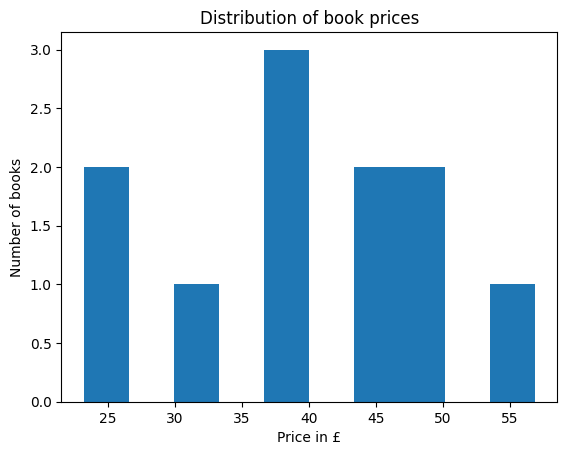

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist('''Code Here''')
plt.xlabel("Price in £")
plt.ylabel("Number of books")
plt.title("Distribution of book prices")
plt.show()


/var/folders/dr/m9v4shms079d9s6z6c8cg57m0000gn/T/ipykernel_33092/1499483393.py:7: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dr/m9v4shms079d9s6z6c8cg57m0000gn/T/ipykernel_33092/1499483393.py:7: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dr/m9v4shms079d9s6z6c8cg57m0000gn/T/ipykernel_33092/1499483393.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/Applications/anaconda3/envs/albert_school/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/envs/albert_school/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


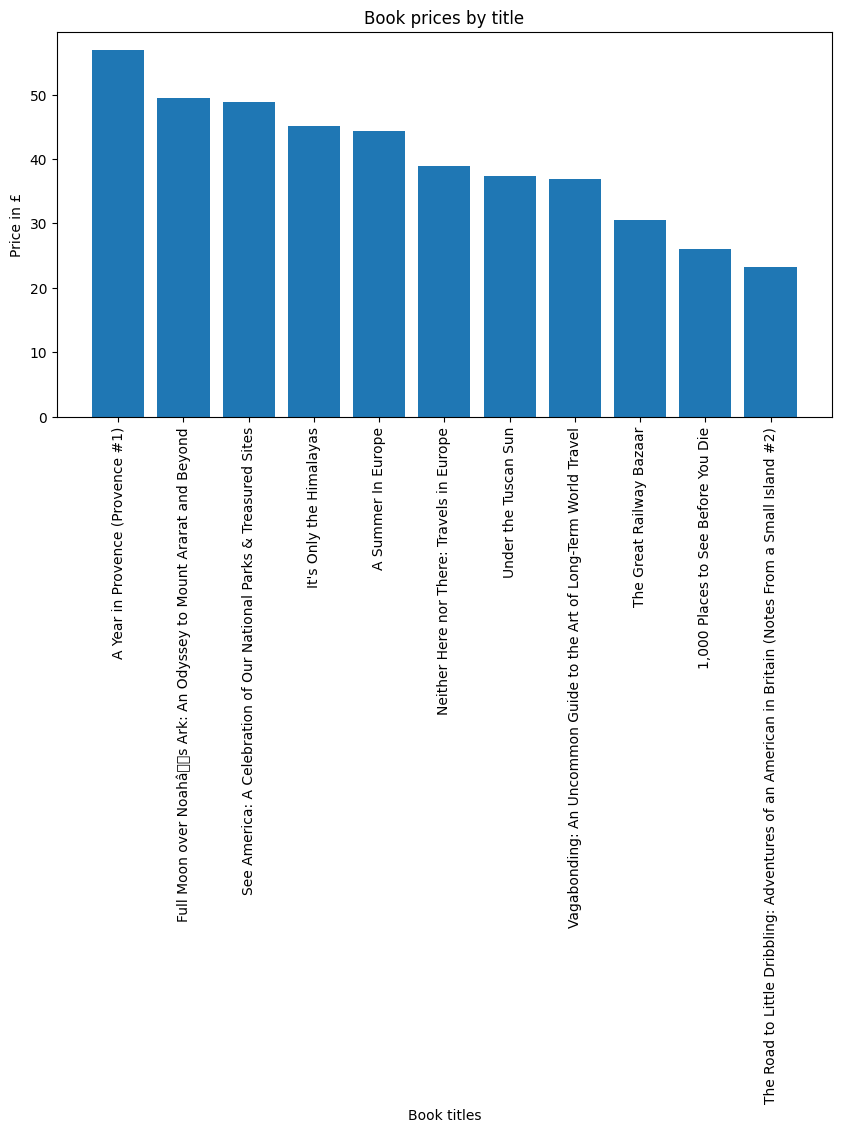

In [15]:
plt.figure(figsize=(10, 5))
plt.bar('''Code Here''')
plt.xticks(rotation=90)
plt.xlabel("Book titles")
plt.ylabel("Price in £")
plt.title("Book prices by title")
plt.tight_layout()
plt.show()